# *Neural Systems, Neural Networks, and Behavior: Unit I Final Project* 

### **Group 2: Faisal Anwar, Caitlyn Talley, Taylor Baugher, Rosario Reyes, and Marisa Brito**

2. (a)
   ##### Below is our code for a <U> leaky integrate and fire model <U> :

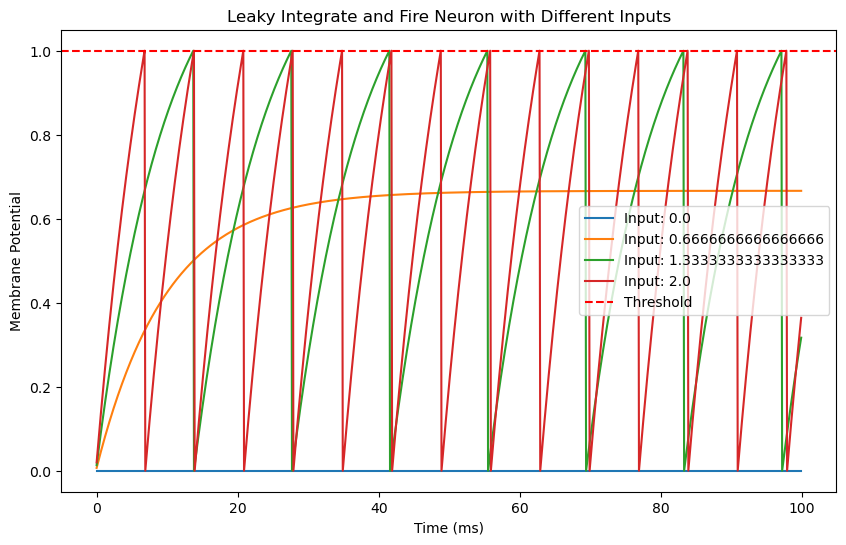

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_integrate_and_fire(current_input, membrane_time_constant, threshold, reset_voltage, simulation_time, dt):
    time_points = np.arange(0, simulation_time, dt)
    membrane_potential = np.zeros_like(time_points)
    spike_times = []

    for i, t in enumerate(time_points):
        if membrane_potential[i-1] >= threshold:
            membrane_potential[i] = reset_voltage
            spike_times.append(t)
        else:
            membrane_potential[i] = membrane_potential[i-1] + (dt / membrane_time_constant) * (current_input - membrane_potential[i-1])

    return time_points, membrane_potential, spike_times

current_input_values = np.linspace(0,2,4)  # Different current inputs
personal_input = 5
membrane_time_constant = 10.0  # Time constant of the membrane
threshold_voltage = 1.0  # Membrane potential threshold for firing
reset_voltage = 0.0  # Membrane potential reset value after firing
simulation_time = 100  # Simulation time in milliseconds
dt = 0.1  # Time step in milliseconds

plt.figure(figsize=(10, 6))

for current_input in current_input_values:
    time_points, membrane_potential, spike_times = leaky_integrate_and_fire(current_input, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt)
    plt.plot(time_points, membrane_potential, label=f'Input: {current_input}')

plt.title('Leaky Integrate and Fire Neuron with Different Inputs')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.axhline(y=threshold_voltage, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()





2. (b)
   ##### Below is our code and plot for the LIF model, but with a <u> voltage-gated sodium channel input <u> added:



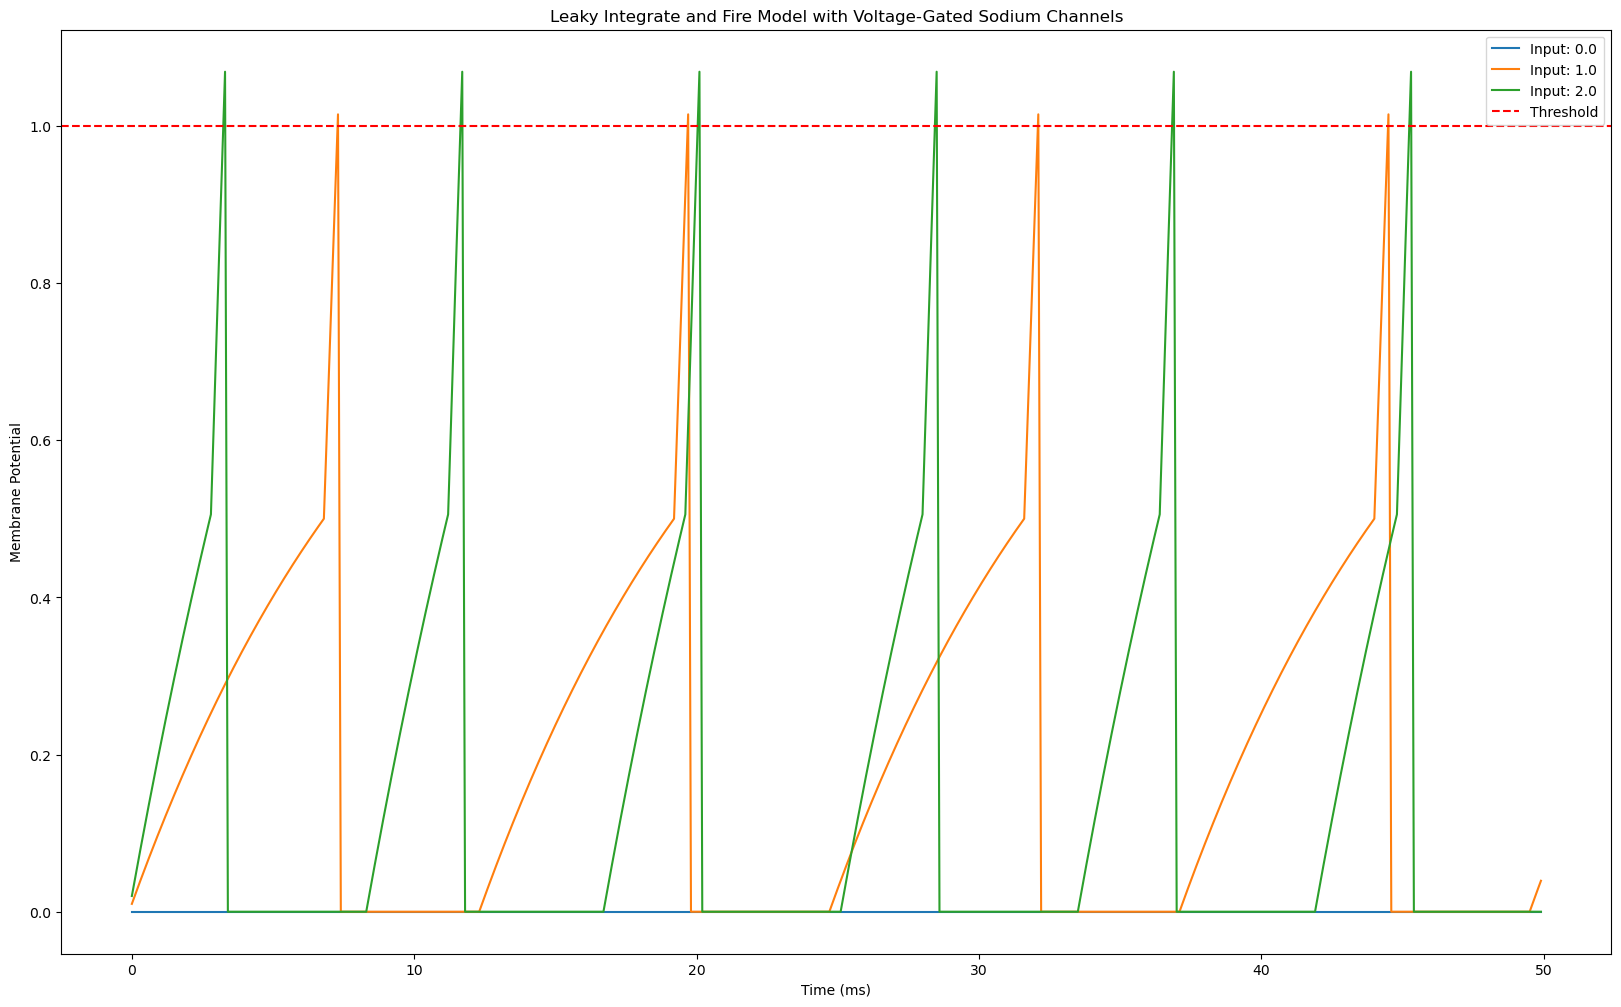

In [35]:
import numpy as np
import matplotlib.pyplot as plt


def leaky_integrate_and_fire(current_input, membrane_time_constant, threshold, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period):
    time_points = np.arange(0, simulation_time, dt)
    membrane_potential = np.zeros_like(time_points)
    spike_times = []
    last_spike_time = -refractory_period


    for i, t in enumerate(time_points):
        if t - last_spike_time < refractory_period:
            membrane_potential[i] = reset_voltage
        elif membrane_potential[i-1] >= threshold:
            membrane_potential[i] = reset_voltage
            spike_times.append(t)
            last_spike_time = t
        else:
            # Calculate sodium current contribution
            sodium_current = 0.0
            if membrane_potential[i-1] >= sodium_channel_threshold:
                sodium_current = 10.0  # Arbitrary value representing sodium current


            # Update membrane potential with sodium current
            membrane_potential[i] = membrane_potential[i-1] + (dt / membrane_time_constant) * (current_input - membrane_potential[i-1] + sodium_current)


    return time_points, membrane_potential, spike_times


# Define parameters
current_input_values = np.linspace(0, 2, 3)  # Different current inputs
personal_input = 5
membrane_time_constant = 10.0  # Time constant of the membrane
threshold_voltage = 1  # Membrane potential threshold for firing
reset_voltage = 0.0  # Membrane potential reset value after firing
simulation_time = 50  # Simulation time in milliseconds
dt = 0.1  # Time step in milliseconds
sodium_channel_threshold = 0.5  # Threshold for opening sodium channels
refractory_period = 5  # Duration of the refractory period in milliseconds


plt.figure(figsize=(20, 12))


for current_input in current_input_values:
    time_points, membrane_potential, spike_times = leaky_integrate_and_fire(current_input, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period)
    plt.plot(time_points, membrane_potential, label=f'Input: {current_input}')


plt.title('Leaky Integrate and Fire Model with Voltage-Gated Sodium Channels')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.axhline(y=threshold_voltage, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()

2. (c)
   ##### Below is our code and a plot for a <u>simple feedforward ANN<u>:

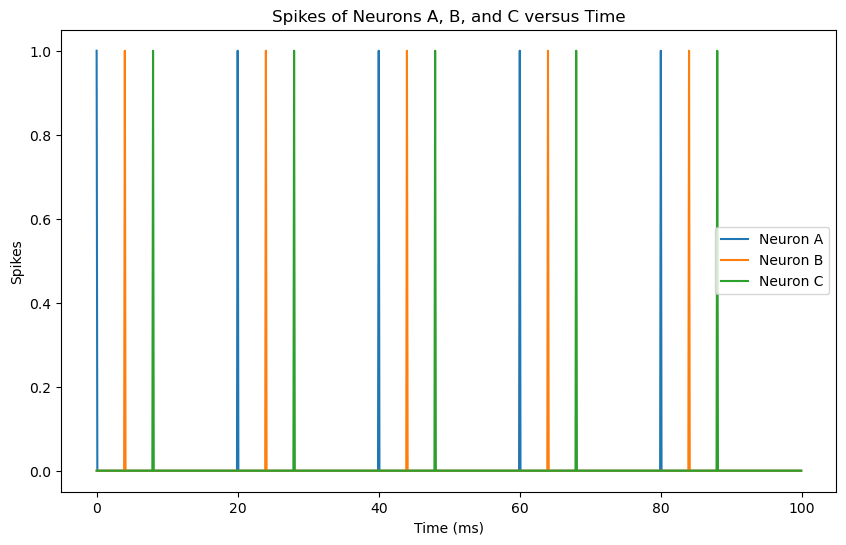

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
time_steps = 1000
dt = 0.1
rate_neuron_A = 50  # Firing rate of neuron A (Hz)
weight_A_to_B = 0.1
weight_B_to_C = 0.2
time_delay_B = 40  # Time delay for neuron B (in time steps)
time_delay_C = 40  # Time delay for neuron C (in time steps)

# Define arrays to store spikes
spikes_A = np.zeros(time_steps)
spikes_B = np.zeros(time_steps)
spikes_C = np.zeros(time_steps)

# Determine spike times for neuron A based on its firing rate
spike_times_A = np.arange(0, time_steps * dt, 1000 / rate_neuron_A)

# Generate spikes for neuron A
for spike_time in spike_times_A:
    spike_index = int(spike_time / dt)
    spikes_A[spike_index] = 1

# Generate spikes for neuron B based on inputs from neuron A with time delay
for t in range(time_delay_B, time_steps):
    if spikes_A[t - time_delay_B] == 1:
        
            spikes_B[t] = 1

# Generate spikes for neuron C based on inputs from neuron B with time delay
for t in range(time_delay_C, time_steps):
    if spikes_B[t - time_delay_C] == 1:
       
            spikes_C[t] = 1

# Plot spikes versus time
plt.figure(figsize=(10, 6))
plt.plot(np.arange(time_steps) * dt, spikes_A, label='Neuron A')
plt.plot(np.arange(time_steps) * dt, spikes_B, label='Neuron B')
plt.plot(np.arange(time_steps) * dt, spikes_C, label='Neuron C')
plt.xlabel('Time (ms)')
plt.ylabel('Spikes')
plt.title('Spikes of Neurons A, B, and C versus Time')
plt.legend()
plt.show()

3.
| **Model** | **Description** | **Benefits** | **Limitations** | **Information Processing Power**
|---|---|---|---|---|
|Simple LIF|Simplest model with leaky ion channels (leaky resistors) that does not fire an action potential|Allows us to monitor the voltage of a neuron, and it integrates multiple excitatory or inhibitory inputs|Cannot generate an AP or spike train because there are no VGSC (spike generators)| Limited
|LIF w/ VGSC|Same as the simple LIF model, but with VGSC to initiate the AP and create a spike train with refractory periods|Allows us to generate a spike train for a neuron|Can only model the firing behavior of one neuron, this is not useful in modeling systems| Large amounts of information processing power, but for one neuron
|Feedforward ANN|A model with more than one neuron; each neuron is sending an excitatory signal forward to the next; there is no feedback, so the signal only moves forward|Allows us to model the firing behavior of multiple neurons which is applicable in neural systems|Since there is no feedback, there is no corrective mechanism; we have to rely on the feedforward signals to be correct| The greatest amount of information processing power out of the three model described

4. ### What happens when inputs differ?



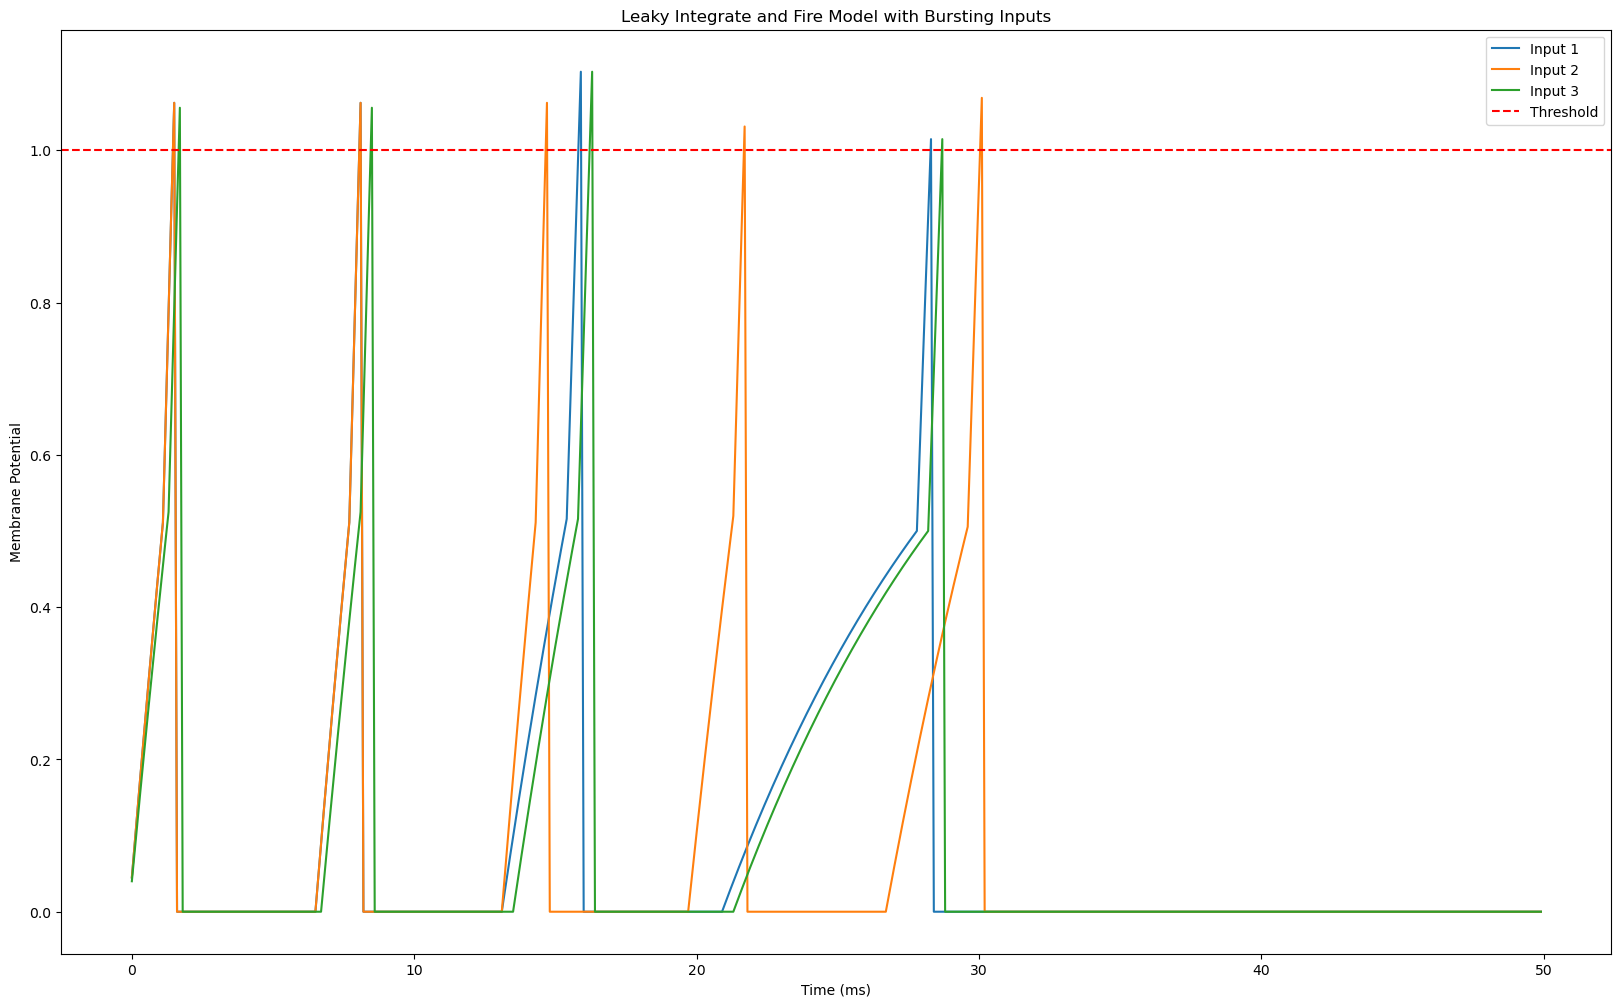

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def burst_input_pattern(simulation_time, dt, burst_durations, burst_amplitudes):
    time_points = np.arange(0, simulation_time, dt)
    input_values = np.zeros_like(time_points)
    for duration, amplitude in zip(burst_durations, burst_amplitudes):
        for i, t in enumerate(time_points):
            if t < duration:
                input_values[i] += amplitude
    return time_points, input_values

def leaky_integrate_and_fire(current_input, membrane_time_constant, threshold, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period):
    time_points = np.arange(0, simulation_time, dt)
    membrane_potential = np.zeros_like(time_points)
    spike_times = []
    last_spike_time = -refractory_period

    for i, t in enumerate(time_points):
        if t - last_spike_time < refractory_period:
            membrane_potential[i] = reset_voltage
        elif membrane_potential[i-1] >= threshold:
            membrane_potential[i] = reset_voltage
            spike_times.append(t)
            last_spike_time = t
        else:
            # Calculate sodium current contribution
            sodium_current = 0.0
            if membrane_potential[i-1] >= sodium_channel_threshold:
                sodium_current = 10.0  # Arbitrary value representing sodium current

            # Update membrane potential with sodium current and input
            membrane_potential[i] = membrane_potential[i-1] + (dt / membrane_time_constant) * (current_input[i] - membrane_potential[i-1] + sodium_current)

    return time_points, membrane_potential, spike_times

# Define parameters
personal_input = 5
membrane_time_constant = 10.0  # Time constant of the membrane
threshold_voltage = 1  # Membrane potential threshold for firing
reset_voltage = 0.0  # Membrane potential reset value after firing
simulation_time = 50  # Simulation time in milliseconds
dt = 0.1  # Time step in milliseconds
sodium_channel_threshold = 0.5  # Threshold for opening sodium channels
refractory_period = 5  # Duration of the refractory period in milliseconds

plt.figure(figsize=(20, 12))

# Define bursting patterns for each input
burst_durations_1 = [10, 20, 30]  # Burst durations for input 1
burst_amplitudes_1 = [2, 1.5, 1]  # Burst amplitudes for input 1
burst_durations_2 = [15, 25, 35]  # Burst durations for input 2
burst_amplitudes_2 = [1, 1.5, 2]  # Burst amplitudes for input 2
burst_durations_3 = [12, 18, 33]  # Burst durations for input 3
burst_amplitudes_3 = [1.5, 1.5, 1]  # Burst amplitudes for input 3

# Create bursting input patterns for each input
time_points_1, input_values_1 = burst_input_pattern(simulation_time, dt, burst_durations_1, burst_amplitudes_1)
time_points_2, input_values_2 = burst_input_pattern(simulation_time, dt, burst_durations_2, burst_amplitudes_2)
time_points_3, input_values_3 = burst_input_pattern(simulation_time, dt, burst_durations_3, burst_amplitudes_3)


# Run simulation with bursting input patterns for each input
time_points_1, membrane_potential_1, spike_times_1 = leaky_integrate_and_fire(input_values_1, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period)
time_points_2, membrane_potential_2, spike_times_2 = leaky_integrate_and_fire(input_values_2, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period)
time_points_3, membrane_potential_3, spike_times_3 = leaky_integrate_and_fire(input_values_3, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period)

# Plot membrane potential for each input
plt.plot(time_points_1, membrane_potential_1, label='Input 1')
plt.plot(time_points_2, membrane_potential_2, label='Input 2')
plt.plot(time_points_3, membrane_potential_3, label='Input 3')

plt.title('Leaky Integrate and Fire Model with Bursting Inputs')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.axhline(y=threshold_voltage, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()


Compare this to our original model: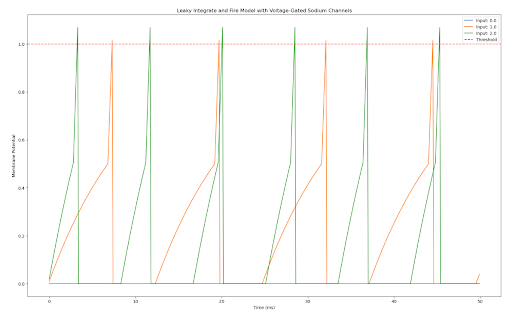

To achieve the new model, we modified the code to include a bursting input. We did this by defining bursting patterns by changing the duration and amplitudes. This new example shows three different inputs that fire more rapidly than the previous model. 



5. ### What happens when inhibitory inputs are implemented?

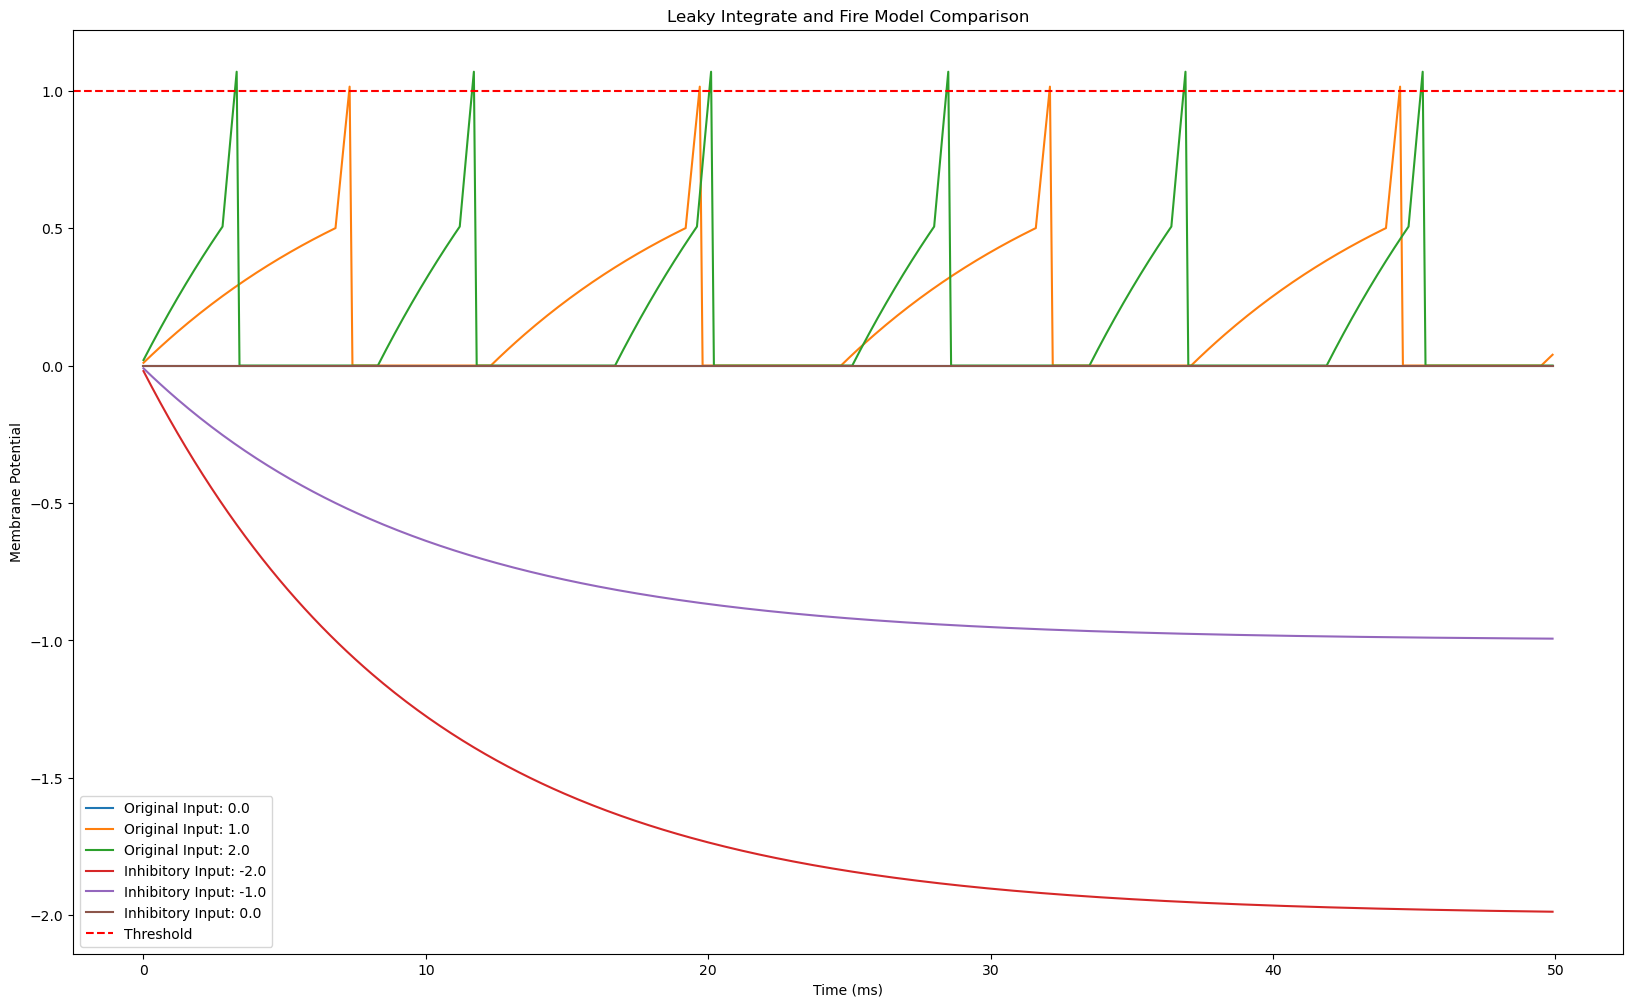

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_integrate_and_fire(current_input, membrane_time_constant, threshold, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period):
    time_points = np.arange(0, simulation_time, dt)
    membrane_potential = np.zeros_like(time_points)
    spike_times = []
    last_spike_time = -refractory_period

    for i, t in enumerate(time_points):
        if t - last_spike_time < refractory_period:
            membrane_potential[i] = reset_voltage
        elif membrane_potential[i-1] >= threshold:
            membrane_potential[i] = reset_voltage
            spike_times.append(t)
            last_spike_time = t
        else:
            # Calculate sodium current contribution
            sodium_current = 0.0
            if membrane_potential[i-1] >= sodium_channel_threshold:
                sodium_current = 10.0  # Positive value representing sodium current

            # Update membrane potential with sodium current
            membrane_potential[i] = membrane_potential[i-1] + (dt / membrane_time_constant) * (current_input - membrane_potential[i-1] + sodium_current)

    return time_points, membrane_potential, spike_times

# Define parameters
current_input_values = np.linspace(0, 2, 3)  # Different current inputs (original excitatory inputs)
inhibitory_input_values = np.linspace(-2, 0, 3)  # Different current inputs (inhibitory inputs)
personal_input = 5
membrane_time_constant = 10.0  # Time constant of the membrane
threshold_voltage = 1  # Membrane potential threshold for firing
reset_voltage = 0.0  # Membrane potential reset value after firing
simulation_time = 50  # Simulation time in milliseconds
dt = 0.1  # Time step in milliseconds
sodium_channel_threshold = 0.5  # Threshold for opening sodium channels
refractory_period = 5  # Duration of the refractory period in milliseconds

plt.figure(figsize=(20, 12))

# Plot original leaky integrate and fire model (with excitatory inputs)
for current_input in current_input_values:
    time_points, membrane_potential, spike_times = leaky_integrate_and_fire(current_input, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period)
    plt.plot(time_points, membrane_potential, label=f'Original Input: {current_input}')

# Plot modified leaky integrate and fire model (with inhibitory inputs)
for current_input in inhibitory_input_values:
    time_points, membrane_potential, spike_times = leaky_integrate_and_fire(current_input, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period)
    plt.plot(time_points, membrane_potential, label=f'Inhibitory Input: {current_input}')

plt.title('Leaky Integrate and Fire Model Comparison')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.axhline(y=threshold_voltage, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()


In this plot, we can see our original plot where the voltage rises and spikes above threshold. We also can see the inhibitory inputs which continuously drive voltage below the threshold. 

In this modified code, the current_input_values are defined as negative values to represent inhibitory inputs, and the membrane potential is updated  in the leaky_integrate_and_fire function by subtracting the inhibitory input from the membrane potential update equation. Overall, it reflects the way inhibitory inputs act as they make the voltage farther away from the threshold which causes action potentials to not fire. 


6. ### Artificial Intelligence:

   Artificial Intelligence (AI) is when machines are made to act and think like humans. An AI is a computer program capable of doing any task a human would normally be required to perform. AI technology has grown exponentially over the past few decades, leading to advancements that once seemed impossible. It spans a wide range of applications, from simple calculators to complex decision-making systems that can outperform human cognitive abilities in specific tasks. The idea of AI has been prevalent in mythology and ancient history but only in the last century have scientists started making real progress in creating machines that can understand and learn on their own.

   _Machine Learning_ : This is a subset of Artificial Intelligence


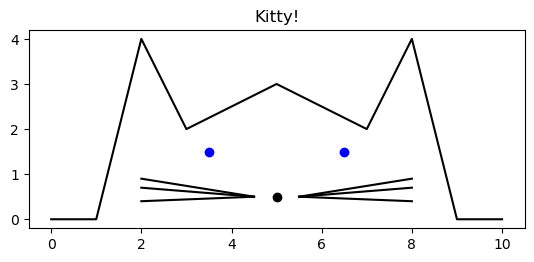

In [4]:
import matplotlib.pyplot as plt

# Define the points to plot for the cat
cat_x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cat_y = [0, 0, 4, 2, 2.5, 3, 2.5, 2, 4, 0, 0]

whiskerx = [5.5,8]
whiskery = [.5,.9]
whiskerx1 = [5.5,8]
whiskery1 = [.5,.7]
whiskerx2 = [5.5,8]
whiskery2 = [.5,.4]

whiskerx3 = [2,4.5]
whiskery3 = [.9,.5]
whiskerx4 = [2,4.5]
whiskery4 = [.7,.5]
whiskerx5 = [2,4.5]
whiskery5 = [.4,.5]

# Plot the cat
plt.plot(cat_x, cat_y, color='black')
plt.scatter(3.5,1.5, color = "blue")
plt.scatter(6.5,1.5,color = "blue")

plt.plot(whiskerx,whiskery, color = "black")
plt.plot(whiskerx1,whiskery1, color = "black")
plt.plot(whiskerx2,whiskery2, color = "black")

plt.plot(whiskerx3,whiskery3, color = "black")
plt.plot(whiskerx4,whiskery4, color = "black")
plt.plot(whiskerx5,whiskery5, color = "black")

plt.scatter(5,.5, color = "black")

plt.title('Kitty!')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()